# Trend Predicting

* **Problem**: Trend Predicting based on user behaviors
* **Description**: 
  * Create online preference index for each major product group
  * Predict demand trends and draw insights by product group
  * Suggest new service from 1), 2)
* **Dataset**: ? non-numeric column, and ? numeric columns
  * ? : ?
  * Non-numeric columns:
    * 16 non-numeric columns : ?
  * Numeric columns: 
    * 104 numeric columns : ?
 


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import os

import datetime

# Load Data

* 'custom.csv'
* 'search1.csv'
* 'search2.csv'
* 'master.csv'
* 'session.csv'
* 'product.csv'


In [3]:
path = Path().resolve().parents[0]
product = pd.read_csv("C:/Users/lsh93/Desktop/Lpoint/data/Product.csv")
search1 = pd.read_csv("C:/Users/lsh93/Desktop/Lpoint/data/Search1.csv")
search2 = pd.read_csv("C:/Users/lsh93/Desktop/Lpoint/data/Search2.csv")
custom = pd.read_csv("C:/Users/lsh93/Desktop/Lpoint/data/Custom.csv")
session = pd.read_csv("C:/Users/lsh93/Desktop/Lpoint/data/Session.csv")
master = pd.read_csv("C:/Users/lsh93/Desktop/Lpoint/data/Master.csv")

C:\Users\lsh93\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
#PD_BUY_CT 내 count에서 '1,387'과 같은 것에서 ','를 삭제해 줘야 
for i in range(len(product)):
    if type(product['PD_BUY_CT'][i]) == str:
        product['PD_BUY_CT'][i] = product['PD_BUY_CT'][i].replace(",","")
    else:
        continue

C:\Users\lsh93\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Merge Data
1) Merge product purchase data to see features which is expected to affect on purchase of client bought given product group, not individual product

- Merge following csv files
    * Product.csv : CLNT_ID, SESS_ID(Brdige), PD_C(Bridge), PD_BUY_CT, PD_BUY_AM
    * Master.csv : PD_C(Bridge), CLAC1_NM, CLAC2_NM, CLAC3_NM
    * Session.csv : SESS_ID(Bridge), SESS_DT, DVC_CTG_NM, ZON_NM, CITY_NM
    * Custom.csv : CLNT_ID, CLNT_GENDER, CLNT_AGE
    
    
- To get data below
  
  
- Client Information
    * CLNT_ID : Client ID (Primary Key)
    * CLNT_GENDER : Client Gender
    * CLNT_AGE : Client Age
    * DVC_CTG_NM : Client Device
    * ZON_NM : Client Location (briefly)
    * CITY_NM : Client Location (in detail)
    
- Purchase Information
    * SESS_DT : Session Date
    * PD_BUY_CT : Number of product purchased
    * PD_BUY_AM : Price of product purchased
    
- Product Information
    * CLAC1_NM : Product group (largest)
    * CLAC2_NM : Product group (moderate)
    * CLAC3_NM : Product group (smallest)
    
    
    
    
  

In [22]:
merge1 = pd.merge(product, master)
merge1 = merge1.drop(['HITS_SEQ','PD_C', 'PD_ADD_NM', 'PD_BRA_NM', 'PD_NM'], axis=1)
merge2 = pd.merge(merge1, session)
merge2 = merge2.drop(['SESS_ID', 'SESS_SEQ','TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V'], axis=1)
merge3 = pd.merge(merge2, custom)

In [23]:
len(merge3['CLNT_ID'].unique())

671679

## Legacy : please ignore




In [19]:
'''
client_for_clustering = []

# for every client
for clnt_idx, clnt_num in enumerate(clnt_id) :
    if clnt_idx <= 100:
        # in a single client
        client = merge3[merge3['CLNT_ID']==clnt_num].copy()
        client.reset_index(drop=True, inplace=True)
        
        # 1) for every combination of clac_nm (CLAC1_NM, CLAC2_NM, CLAC3_NM)
        clac_nm = client[['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']].copy().drop_duplicates()
        get_attributes(client, clac_nm, client_for_clustering, 3)
            
            
        # 2) for every combination of clac_nm (CLAC1_NM, CLAC2_NM)
        clac_nm = client[['CLAC1_NM', 'CLAC2_NM']].copy().drop_duplicates()
        get_attributes(client, clac_nm, client_for_clustering, 2)
        
        # 3) for every combination of clac_nm (CLAC1_NM)
        clac_nm = client[['CLAC1_NM']].copy().drop_duplicates()
        get_attributes(client, clac_nm, client_for_clustering, 1)

    else :
        break;
            
client_for_clustering = pd.DataFrame(client_for_clustering)
client_for_clustering.columns = ['CLNT_ID',
                               'CLAC1_NM',
                               'CLAC2_NM',
                               'CLAC3_NM',
                               'TOTAL_PRICE',
                               'TOTAL_COUNT',
                               'TOTAL_AMOUNT',
                               'AVG_PRICE',
                               'AVG_AMOUNT',
                               'RECENT',
                               'FIRST_TIME',
                               'REPEAT',
                               'LAPSED',
                               'ZON_NM',
                               'CITY_NM',
                               'CLNT_GENDER',
                               'CLNT_AGE']

client_for_clustering
'''

"\nclient_for_clustering = []\n\n# for every client\nfor clnt_idx, clnt_num in enumerate(clnt_id) :\n    if clnt_idx <= 100:\n        # in a single client\n        client = merge3[merge3['CLNT_ID']==clnt_num].copy()\n        client.reset_index(drop=True, inplace=True)\n        \n        # 1) for every combination of clac_nm (CLAC1_NM, CLAC2_NM, CLAC3_NM)\n        clac_nm = client[['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']].copy().drop_duplicates()\n        get_attributes(client, clac_nm, client_for_clustering, 3)\n            \n            \n        # 2) for every combination of clac_nm (CLAC1_NM, CLAC2_NM)\n        clac_nm = client[['CLAC1_NM', 'CLAC2_NM']].copy().drop_duplicates()\n        get_attributes(client, clac_nm, client_for_clustering, 2)\n        \n        # 3) for every combination of clac_nm (CLAC1_NM)\n        clac_nm = client[['CLAC1_NM']].copy().drop_duplicates()\n        get_attributes(client, clac_nm, client_for_clustering, 1)\n\n    else :\n        break;\n            \ncl

## Copy & Paste code below

In [24]:
def get_attributes(client, clnt_num, clac_nm, client_for_clustering, num_combination) : 

    for clac_idx in range(clac_nm.shape[0]) :

        # attributes to save
        total_price = 0
        total_count = 0
        total_amount = 0
            
        recent = 0
        first_time = 0
        repeat = 0
        lapsed = 0
            
        # variables (not saved)
        latest_purchase = datetime.datetime(2018,1,1)
        lastday = datetime.datetime(2018,9,29)
            
        # loop rows of each client
        for pur_idx in range(client.shape[0]) :
            if num_combination == 3 : 
                purchased = client[['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']].iloc[pur_idx, :]
            if num_combination == 2 :
                purchased = client[['CLAC1_NM', 'CLAC2_NM']].iloc[pur_idx, :]
            if num_combination == 1 :
                purchased = client[['CLAC1_NM']].iloc[pur_idx, :]
            unique_cn = clac_nm.iloc[clac_idx, :]
                
            if purchased.equals(unique_cn) :

                temp = str(client.iloc[pur_idx, :]['SESS_DT'])
                today = datetime.datetime(int(temp[0:4]), int(temp[4:6]), int(temp[6:8]))
                if (today-latest_purchase).days >= 0 :
                    latest_purchase = today  
                total_price += int(client[['PD_BUY_AM']].iloc[pur_idx, 0].replace(',', '')) * int(client[['PD_BUY_CT']].iloc[pur_idx, 0])
                total_count += 1
                total_amount += int(client[['PD_BUY_CT']].iloc[pur_idx, 0])
            
        # attributes to save
        average_price = int(total_price/total_amount)
        average_amount = int(total_amount/total_count)
        if (lastday - latest_purchase).days <= 30 :
            recent = 1
            if total_count == 1 :
                first_time = 1
        if total_count >= 2 :
            repeat = 1
        if (lastday - latest_purchase).days >= 120 :
            lapsed = 1
        
        if num_combination == 3 :
            new_row = [clnt_num, 
                    unique_cn[0], 
                    unique_cn[1], 
                    unique_cn[2], 
                    total_price,
                    total_count,
                    total_amount,
                    average_price,
                    average_amount,
                    recent,
                    first_time,
                    repeat,
                    lapsed,
                    client['ZON_NM'][0],
                    client['CITY_NM'][0],
                    client['CLNT_GENDER'][0],
                    client['CLNT_AGE'][0]]  
        if num_combination == 2 :
            new_row = [clnt_num, 
                    unique_cn[0], 
                    unique_cn[1], 
                    'NaN', 
                    total_price,
                    total_count,
                    total_amount,
                    average_price,
                    average_amount,
                    recent,
                    first_time,
                    repeat,
                    lapsed,
                    client['ZON_NM'][0],
                    client['CITY_NM'][0],
                    client['CLNT_GENDER'][0],
                    client['CLNT_AGE'][0]]  
        if num_combination == 1 :
            new_row = [clnt_num, 
                    unique_cn[0], 
                    'NaN', 
                    'NaN', 
                    total_price,
                    total_count,
                    total_amount,
                    average_price,
                    average_amount,
                    recent,
                    first_time,
                    repeat,
                    lapsed,
                    client['ZON_NM'][0],
                    client['CITY_NM'][0],
                    client['CLNT_GENDER'][0],
                    client['CLNT_AGE'][0]]  

        client_for_clustering.append(new_row)

In [25]:
def how_many_clients(clacset) : 
    length = 3
    if clacset[2] == 'NaN' :
        length -= 1
    if clacset[1] == 'NaN' :
        length -= 1    

    target = merge3[merge3['CLAC1_NM']==clacset[0]].copy()
    if length >= 2 :
        target = target[target['CLAC2_NM']==clacset[1]].copy()
    if length >= 3 : 
        target = target[target['CLAC3_NM']==clacset[2]].copy()
    
    print(target['CLNT_ID'].unique().shape[0])
    return target['CLNT_ID'].unique().shape[0]

In [26]:
def get_dataset_for_clac(clacset, num_clients) :
    # set numbers of clac_nm
    length = 3
    if clacset[2] == 'NaN' :
        length -= 1
    if clacset[1] == 'NaN' :
        length -= 1
    
    target = merge3[merge3['CLAC1_NM']==clacset[0]].copy()
    if length >= 2 :
        target = target[target['CLAC2_NM']==clacset[1]].copy()
    if length >= 3 : 
        target = target[target['CLAC3_NM']==clacset[2]].copy()
    client_for_clustering = []
    
    clnt_id = target['CLNT_ID'].unique()
    clac1_nm = target['CLAC1_NM'].unique()
    clac2_nm = target['CLAC2_NM'].unique()
    clac3_nm = target['CLAC3_NM'].unique()
          
    # for every client
    for clnt_idx, clnt_num in enumerate(clnt_id) :
        if clnt_idx <= num_clients:
            # in a single client
            client = target[target['CLNT_ID']==clnt_num].copy()
            client.reset_index(drop=True, inplace=True)
        
            # 1) for every combination of clac_nm (CLAC1_NM, CLAC2_NM, CLAC3_NM)
            if length == 3 :
                clac_nm = client[['CLAC1_NM', 'CLAC2_NM', 'CLAC3_NM']].copy().drop_duplicates()
                get_attributes(client, clnt_num, clac_nm, client_for_clustering, 3)
                    
            # 2) for every combination of clac_nm (CLAC1_NM, CLAC2_NM)
            if length == 2 :
                clac_nm = client[['CLAC1_NM', 'CLAC2_NM']].copy().drop_duplicates()
                get_attributes(client, clnt_num, clac_nm, client_for_clustering, 2)
        
            # 3) for every combination of clac_nm (CLAC1_NM)
            if length == 1 : 
                clac_nm = client[['CLAC1_NM']].copy().drop_duplicates()
                get_attributes(client, clnt_num, clac_nm, client_for_clustering, 1)

        else :
            break;
            
    client_for_clustering = pd.DataFrame(client_for_clustering)
    client_for_clustering.columns = ['CLNT_ID',
                               'CLAC1_NM',
                               'CLAC2_NM',
                               'CLAC3_NM',
                               'TOTAL_PRICE',
                               'TOTAL_COUNT',
                               'TOTAL_AMOUNT',
                               'AVG_PRICE',
                               'AVG_AMOUNT',
                               'RECENT',
                               'FIRST_TIME',
                               'REPEAT',
                               'LAPSED',
                               'ZON_NM',
                               'CITY_NM',
                               'CLNT_GENDER',
                               'CLNT_AGE']

    return client_for_clustering

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

def transform_scale_df(df) :
    # cataegory -> numeric, in later version it should be modifed as one-hot vector
    for idx, column in enumerate(df.dtypes) :
        if column == object and idx >= 4:
            df.iloc[:, idx] = pd.factorize(df.iloc[:, idx])[0]
    
    # scale
    for idx, column in enumerate(df.columns) :
        if idx >= 4 :
            df.iloc[:, idx] = scaler.fit_transform(pd.DataFrame(df.iloc[:, idx]))
    
    return df

In [28]:
from sklearn.cluster import KMeans

def get_cluster_for_clac(clacset, num_clients, method, test=False, k=0) :
    dataset = get_dataset_for_clac(clacset, num_clients)
    dataset = transform_scale_df(dataset)
    # code below should be updated when we get different attributes for customer clustering
    
    if method == "kmeans" : 
        if test == False :
            km = KMeans(n_clusters=k)
            km.fit(dataset.iloc[:, 4:])
            labels = pd.DataFrame(km.labels_)
            labels.columns = ['CLUSTER']
            results = pd.concat([dataset,labels], axis=1)
            return results
        elif test == True :
            Sum_of_squared_distances = []
            K = range(1,k)
            for k in K:
                km = KMeans(n_clusters=k)
                km = km.fit(dataset.iloc[:, 4:])
                Sum_of_squared_distances.append(km.inertia_)
            plt.plot(K, Sum_of_squared_distances, 'bx-')
            plt.xlabel('k')
            plt.ylabel('Sum_of_squared_distances')
            plt.title('Elbow Method For Optimal k')
            plt.show()


179969


C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

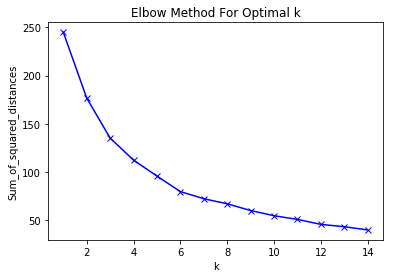

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

,CLNT_ID,CLAC1_NM,CLAC2_NM,CLAC3_NM,TOTAL_PRICE,TOTAL_COUNT,TOTAL_AMOUNT,AVG_PRICE,AVG_AMOUNT,RECENT,FIRST_TIME,REPEAT,LAPSED,ZON_NM,CITY_NM,CLNT_GENDER,CLNT_AGE,CLUSTER
0,5444959,스포츠패션,NaN,NaN,0.006235,0.02,0.02,0.045512,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.4,0
1,5153670,스포츠패션,NaN,NaN,0.030656,0.04,0.04,0.146731,0.0,0.0,0.0,1.0,0.0,0.066667,0.016393,0.0,0.4,0
2,5544237,스포츠패션,NaN,NaN,0.027493,0.02,0.02,0.222250,0.0,0.0,0.0,1.0,1.0,0.066667,0.016393,0.0,0.2,1
3,5724256,스포츠패션,NaN,NaN,0.213851,0.30,0.30,0.171666,0.0,0.0,0.0,1.0,1.0,0.066667,0.016393,0.0,0.6,1
4,4772815,스포츠패션,NaN,NaN,0.041179,0.00,0.00,0.728951,0.0,1.0,1.0,0.0,0.0,0.066667,0.016393,0.0,0.2,2


In [29]:
# 1. 보고싶은 제품군
clacset = ['스포츠패션','NaN','NaN']    
#clacset = ['화장품/뷰티케어', '메이크업', '블러셔/쉐이딩/하이라이터'] 

# 2. 해당 제품군을 구매한 사람이 몇명인지
how_many_clients(clacset)

# 3. 몇명을 불러와서 클러스터링할지 -> 해당 제품군의 소비자중 300명에 대한 클러스터링 결과가 나옴
num_clients = 300

# 4. 클러스터의 개수를 몇개로 할지 정하고 싶을때, k : max k
get_cluster_for_clac(clacset, num_clients, 'kmeans', k=15, test=True)

# 5. 클러스터 개수를 정했을때 그 데이터프레임을 내놓아라, k : # of clusters, output : Pandas DataFrame
get_cluster_for_clac(clacset, num_clients, 'kmeans', k=3).head()

In [30]:
# 1. 보고싶은 제품군
all_clacset = ['스포츠패션', '남성의류', '유아동의류', '청소/세탁/욕실용품', '완구', '패션잡화', '시즌스포츠',
       '여성의류', '인테리어/조명', '속옷/양말/홈웨어', '과일', '화장품/뷰티케어', '건강식품',
       '문구/사무용품', '주방잡화', '생활/주방가전', '침구/수예', '컴퓨터', '계절가전', '가구',
       '식기/조리기구', '모바일', '헬스/피트니스', '아웃도어/레저', '퍼스널케어', '세제/위생',
       '출산/육아용품', '음료', '구기/필드스포츠', '냉장/세탁가전', '냉동식품', '냉장식품', '원예/애완',
       '상품권', '자동차용품', '축산물', '영상/음향가전']
#각 상품 대분류마다 총 clients 수
total_clients = np.zeros(len(all_clacset))
#각 상품 대분류마다 sampling할 client 수
num_clients = np.zeros(len(all_clacset))

for i in range(len(all_clacset)):
    clacset = [all_clacset[i],'NaN','NaN'] #대분류만 볼 것임
    total_clients[i] = how_many_clients(clacset) #각 제품군별로 clients 수 저장

p = 60000/total_clients.sum()
num_clients = total_clients*p
num_clients = np.floor(num_clients) #내림

179969
125112
73505
18982
23138
175884
57646
147115
3111
100601
11245
174155
52360
17357
20527
24395
30230
10278
8184
21184
28821
13445
12040
20888
56763
21582
53808
22695
12797
3514
5381
6503
23031
6098
761
3356
2659


In [31]:
num_clients.sum()

59981.0

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

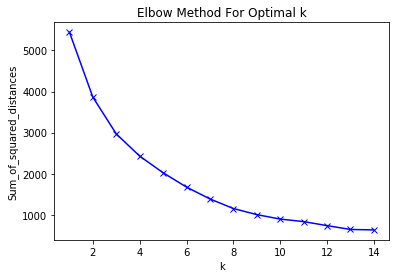

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

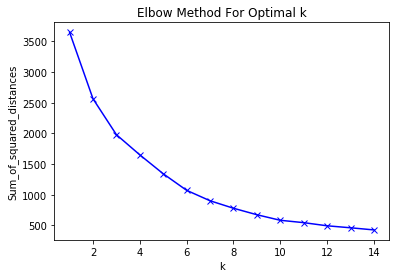

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

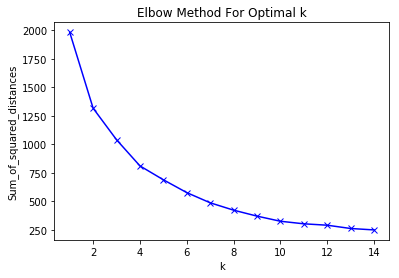

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

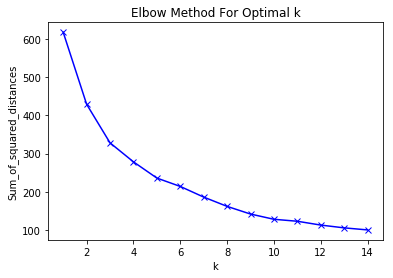

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

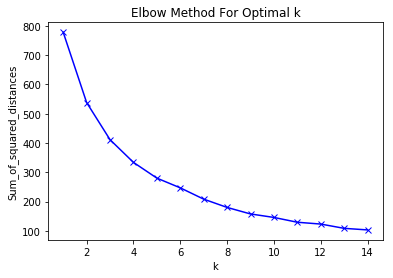

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

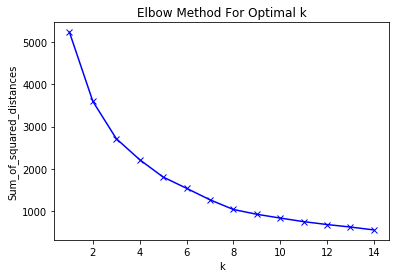

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

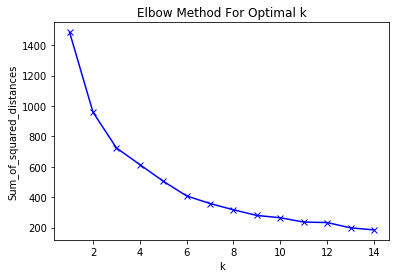

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

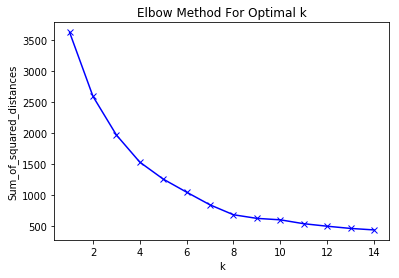

ValueError: invalid literal for int() with base 10: '1,440'

In [20]:
# 4. 클러스터의 개수를 몇개로 할지 정하고 싶을때, k : max k
for i in range(len(all_clacset)):
    clacset = [all_clacset[i],'NaN','NaN'] #대분류만 볼 것임
    get_cluster_for_clac(clacset, num_clients[i], 'kmeans', k=15, test=True)

In [32]:
# 5. 클러스터 개수를 정했을때 그 데이터프레임을 내놓아라, k : # of clusters, output : Pandas DataFrame
#위 plot을 봤을 때 4개 정도가 괜찮다고 생각

#df 생성 때문에 0번째 대분류는 따로 빼둠
clacset = [all_clacset[0],'NaN','NaN'] #대분류만 볼 것임
df = get_cluster_for_clac(clacset, num_clients[0], 'kmeans', k=4)

for i in range(1,len(all_clacset)):
    clacset = [all_clacset[i],'NaN','NaN'] #대분류만 볼 것임
    temp = get_cluster_for_clac(clacset, num_clients[i], 'kmeans', k=4)
    df = pd.concat([df,temp]) 

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lsh93\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMax

In [33]:
len(df)

60018

In [34]:
op_clients = df[['CLNT_ID']].drop_duplicates()
len(op_clients)

15051

In [35]:
#선호지수에 사용할 client 샘플 내보내기
op_clients.to_csv("C:/Users/lsh93/Desktop/Lpoint/output/op_clients.csv", encoding="UTF-8")